In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from vega_datasets import data

***
***
***

In [2]:
df = data.sf_temps()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


Some of the Frequency String options:

B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseconds
U, us     microseconds
N         nanoseconds

Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [14]:
# Resample by the day and take the average temperature. Visualize the average temperature over time.
#   There's no need to make any dtype conversions at present, since data is already datetime64
df2 = df.set_index('date').sort_index()
type(df2.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
# 'D' is used for "one absolute day", AKA calendar day frequency
df2 = df2.resample('D').mean()
# this falls under the type 'method'

<AxesSubplot:title={'center':'Generic Title'}, xlabel='date'>

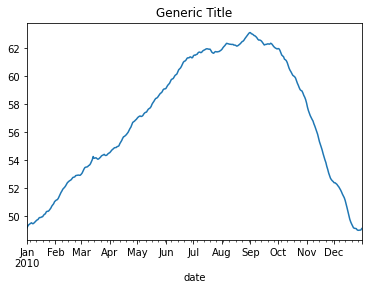

In [16]:
df2.temp.plot(title='Generic Title')

***

<AxesSubplot:xlabel='date'>

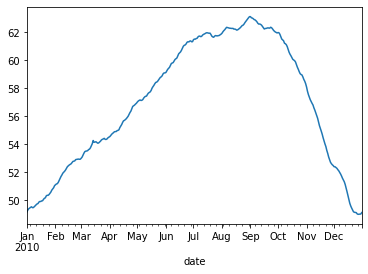

In [17]:
# Write the code necessary to visualize the minimum temperature over time.
# So, a similar method, just using .min() instead of .mean() 
daily_min_per_month = df2.resample('D').min()
daily_min_per_month.temp.plot()

I'll want to overlap all of these toward the end, but for now, press on
***

<AxesSubplot:xlabel='date'>

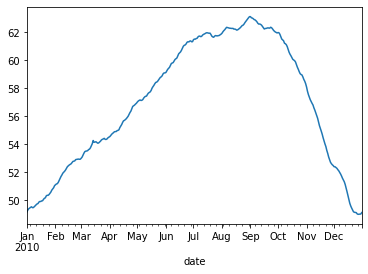

In [18]:
# Write the code necessary to visualize the maximum temperature over time
# Still going by day, just with .max() now
daily_max = df2.resample('D').max()
daily_max.temp.plot()

***

In [19]:
# Which month is the coldest, on average?

# First create a column for the months. 
df2['month'] = df2.index.month_name()
print(f' The coldest month on average is {df2.groupby("month").temp.mean().sort_values().idxmin()}')

# The string method will be different, resampling on 'M' which is the month's end. The month's beginning (monthstart) would be MS
print(' \n December and January are very close, but Jan takes the cake.')
df2.resample('M').temp.mean().sort_values().nsmallest(n=5)


 The coldest month on average is January
 
 December and January are very close, but Jan takes the cake.


date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956948
2010-11-30    55.185139
Name: temp, dtype: float64

***

In [20]:
# Which month has the highest average temperature?

print(f' The hottest month on average is {df2.groupby("month").temp.mean().sort_values().idxmax()}')
print(' \n September is the hotty. Aaaand September 30th is my birthday. :)')
df2.resample('M').temp.mean().sort_values().nlargest(n=5)

 The hottest month on average is September
 
 September is the hotty. Aaaand September 30th is my birthday. :)


date
2010-09-30    62.487083
2010-08-31    62.405376
2010-07-31    61.765457
2010-06-30    60.444722
2010-10-31    60.253091
Name: temp, dtype: float64

***

<AxesSubplot:xlabel='date'>

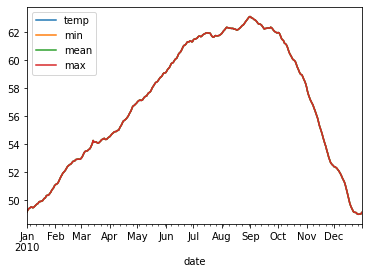

In [21]:
# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
# Use this resampled dataframe to calculate the change in temperature for the day. 
# Which month has the highest daily temperature variability?
ax = df2.plot()
# NB. Be careful of multi indexes and aggregating series vs. dataframes
df2.resample('D').temp.agg(['min', 'mean', 'max']).plot(ax=ax)
# this isn't working for me. 
# I'll need to go back and check the repo to see what I missed. Probably has to do with the index. 

***
***
***

In [22]:
df3 = data.seattle_weather()
df3

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?


In [23]:
# Which year and month combination has the highest amount of precipitation?
# So sampling proceeds with 'M', now in a new dataframe.
# Sum will give me this. 
df4 = df3.set_index('date').sort_index()
print('December 2015 has the highest precipitation')
df4.resample('M').precipitation.sum().sort_values(ascending=False).nlargest(n=1)
# I could have also accomplished this, at the tail-end, with head(1)


December 2015 has the highest precipitation


date
2015-12-31    284.5
Name: precipitation, dtype: float64

***

<AxesSubplot:xlabel='date'>

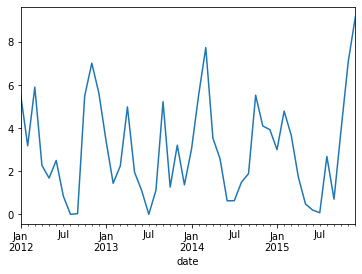

In [24]:
# Visualize the amount of monthly precipitation over time.
df4.resample('M').precipitation.mean().plot()

***

<AxesSubplot:xlabel='date'>

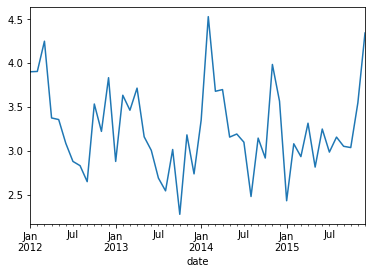

In [25]:
# Visualize the amount of wind over time. Choose a time interval you think is appropriate
# Windiest months makes the most sense to me. If there weren't several years at play, days could be fun. 
df4.resample('M').wind.mean().plot()

<AxesSubplot:xlabel='date'>

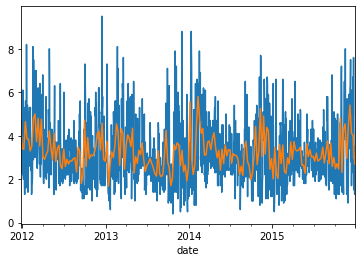

In [26]:
# I'll look at others just because. 
df4.resample('D').wind.mean().plot() # blue
df4.resample('W').wind.mean().plot() # orange

***

In [27]:
# Which year-month combination is the windiest?
df4.resample('m').wind.max().nlargest(n=5)
# December takes first and second place, for 2012 and 2013 respectively. 

date
2012-12-31    9.5
2013-12-31    8.8
2014-01-31    8.8
2012-01-31    8.2
2012-02-29    8.1
Name: wind, dtype: float64

***

In [28]:
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
# without that hint this would have taken a moment, anyway:
u_r_my_sunshine = df4[df4.weather == 'sun']
sunshine = u_r_my_sunshine.weather.replace('sun', 1)
sunshine.resample('Y').sum().sort_values().nlargest(n=3)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
Name: weather, dtype: int64

In [34]:
# In which month does it rain the most?
df4['month'] = df4.index.month

In [35]:
df4.groupby('month').precipitation.max().sort_values(ascending=False).head(1)

month
3    55.9
Name: precipitation, dtype: float64

In [39]:
# Which month has the most number of days with a non-zero amount of precipitation?
df4['nonzero_prec'] = df4 != 0 
df4['nonzero_prec'] = df4['nonzero_prec'].replace(True, 1)

ValueError: Wrong number of items passed 6, placement implies 1

***
***
***

In [40]:
flights = data.flights_20k()
flights = flights.set_index('date').sort_index()

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [41]:
# Convert any negative delays to 0.
df_delay = flights.delay.where(flights.delay > 0, 0)

In [43]:
df_delay

date
2001-01-01 00:01:00    14
2001-01-01 06:20:00     0
2001-01-01 06:30:00     0
2001-01-01 07:00:00     0
2001-01-01 07:00:00     0
                       ..
2001-03-31 21:02:00    26
2001-03-31 21:05:00     0
2001-03-31 21:05:00     0
2001-03-31 21:30:00    30
2001-03-31 21:30:00     0
Name: delay, Length: 20000, dtype: int64

In [45]:
# Which hour of the day has the highest average delay?
flights['hour'] = flights.index.hour
flights.groupby('hour').delay.mean().sort_values(ascending=False).head(1)

hour
3    302.5
Name: delay, dtype: float64

In [46]:
# Does the day of the week make a difference in the delay amount?
flights['day_name'] = flights.index.day_name()
flights.groupby('day_name').delay.mean().sort_values()

day_name
Monday        3.595973
Saturday      4.667520
Tuesday       6.198981
Sunday        7.255164
Wednesday     8.161416
Thursday     10.245766
Friday       15.594452
Name: delay, dtype: float64

<AxesSubplot:xlabel='day_name'>

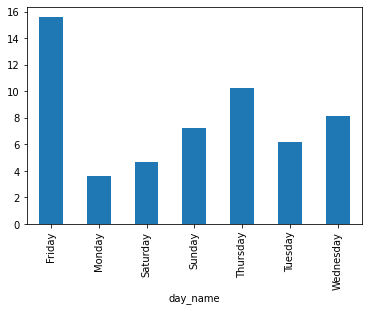

In [47]:
flights.groupby('day_name').delay.mean().plot(kind='bar')

In [48]:
# Does the month make a difference in the delay amount?
flights['month'] = flights.index.month_name()

<AxesSubplot:xlabel='month'>

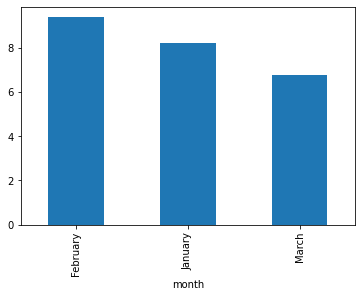

In [49]:
flights.groupby('month').delay.mean().plot(kind='bar')